In [1]:
import numpy as np
import cv2 as cv
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

%matplotlib inline 

In [2]:
# After we publish the stable version on Pypi, you can use 
# import pv-vision

sys.path.append("../../pv-vision")
from pv_vision.transform_crop.solarmodule import MaskModule

In this tutorial, we will learn how to use pv-vision to 
crop a module image into single cells using our 'contour-detection' method. 

Note how our tool is robust to the mounting rack in the background


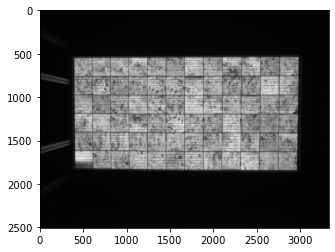

In [4]:
img = cv.imread('../examples/transform_seg/module_imgs/example_3.jpg', 0)
raw_module = MaskModule(img, 6, 12, 3) # 6 rows && 10 columns && 3 busbar
plt.imshow(raw_module.image, 'gray')

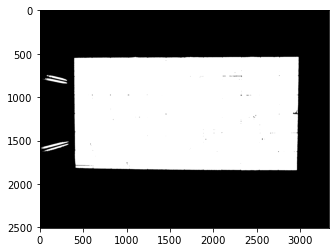

In [12]:
## Load mask.
## Note that this is different from the transform_cnn 
## method where the mask is predicted by a cnn model.
## In this image, the background is not very complex, so
## we can use simpler computer vision method.

mask = raw_module.load_mask(thre=0.6, output=True)
plt.imshow(mask, "gray")

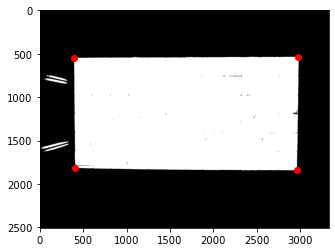

In [13]:
# detect corners
corners = raw_module.corner_detection_cont(output=True)
plt.imshow(raw_module.mask, 'gray')

x, y = zip(*corners)
plt.scatter(x, y, c='r')

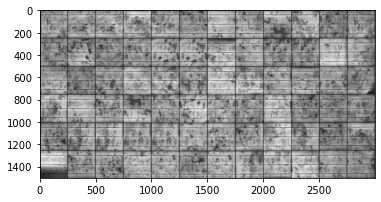

In [14]:
# transform modules
img_transformed = raw_module.transform(cellsize=250, img_only=True)
plt.imshow(img_transformed, 'gray')

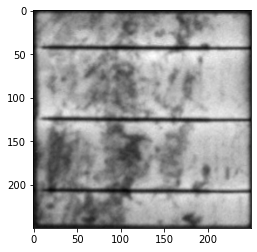

In [17]:
# crop cells
single_cells = raw_module.crop_cell(250, vl_interval=200, vl_split_size=250,
                  hl_interval=200, hl_split_size=250, margin=100)
plt.imshow(single_cells[50], 'gray')

# Done!